# Import Libraries

In [15]:
import numpy as np
from scipy import stats as st
import random as rnd
import matplotlib.pyplot as plt

## Correlation function
correlation coffectients show how strongly is the linear relationship. It ranges from [-1,1].

In [21]:
def corr(x,y):
    r = 0
    z_x = st.zscore(x)
    z_y = st.zscore(y)
    N = len(z_x)
    for i in range(N):
        r = r + (z_x[i])*(z_y[i])
    return r / N

This function generate random x,y numbers so that they have correlation of certain threshold

In [86]:
def generate_x_y(threshold):
    x = np.array(random.sample(range(1,50),20))
    y = np.array(random.sample(range(1,50),20))
    while abs(corr(x,y)) < threshold:
        x = np.array(random.sample(range(1,50),20))
        y = np.array(random.sample(range(1,50),20))
    return x,y

Text(0, 0.5, 'height')

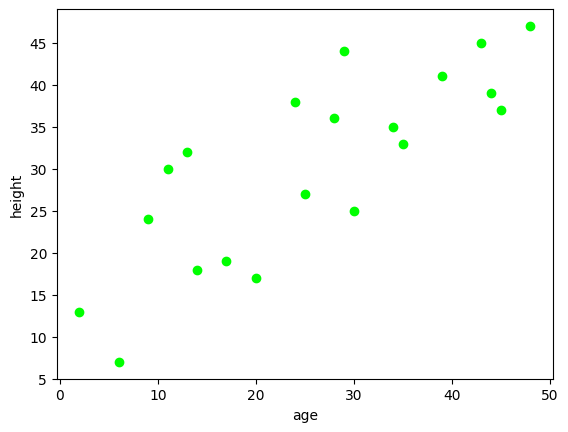

In [96]:
x, y = generate_x_y(0.8)
plt.scatter(x,y,color='lime')
plt.xlabel("age")
plt.ylabel("height")

In [91]:
def linear_reg(x,y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    std_x = np.std(x)
    std_y = np.std(y)
    r = corr(x,y)
    b = r*(std_y/std_x)
    a = mean_y - b*mean_x
    return a,b
def function(x,y,z):
    a,b = linear_reg(x,y)
    return a + b*z

In [92]:
a, b = linear_reg(x,y)
print(a,b)

-0.5077196270902213 0.9066574590177413


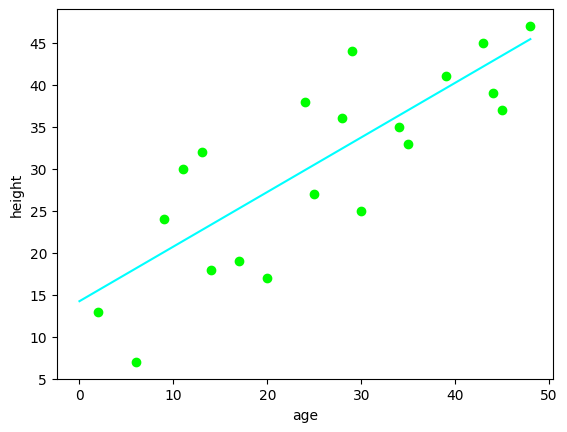

In [97]:
plt.scatter(x,y,color='lime')
plt.xlabel("age")
plt.ylabel("height")
z= np.array([i for i in range(1,50,1)])
plt.plot(function(x,y,z),color='aqua')

In [110]:
def plot_residuals(x,y):
    z = function(x,y,x)
    k = [z[i] - y[i] for i in range(len(y))]
    plt.scatter(x,k,color='orange')
    plt.plot(x,np.zeros_like(x),color='lime')

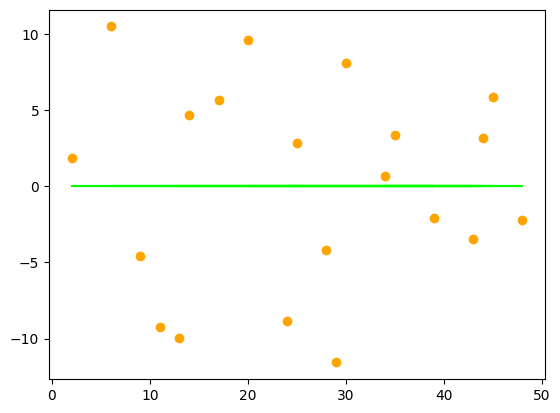

In [111]:
plot_residuals(x,y)